# How to call text-to-image DIAL applications

From [this notebook](https://github.com/epam/ai-dial/blob/main/dial-cookbook/examples/how_to_call_text_to_image_applications.ipynb), you will learn how to call text-to-image applications via [DIAL API chat/completions](https://epam-rail.com/dial_api#/paths/~1openai~1deployments~1%7BDeployment%20Name%7D~1chat~1completions/post) call.

**DIAL Application** is a general term, which encompasses model Adapters and Applications with any custom logic.

DIAL currently supports a few text-to-image model adapters:

* [DALL-E-3](https://github.com/epam/ai-dial-adapter-openai/)
* [Google Imagen](https://github.com/epam/ai-dial-adapter-vertexai/)
* [Stability diffusion](https://github.com/epam/ai-dial-adapter-bedrock/)

These models follow the same pattern of usage: they take the last user message as a prompt for image generation and return the generated image in the response.

For example purposes, we are going to use a sample text-to-image application called `render-text` which prints the user prompt as an image.

## Setup

**Step 1**: install all the necessary dependencies and import the libraries we are going to use.

In [1]:
%pip install -r ../python-notebooks-runner/requirements.txt > /dev/null

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import openai
import langchain_openai

**Step 2**: run `docker compose` in a separate terminal to start the **DIAL Core** server locally along with the `render-text` application.

```sh
(cd ..; docker compose up core render-text)
```

**Step 3**: configure DIAL Core URL: it will be `http://localhost:8080`, if the DIAL Core is run locally.

In [2]:
import os
dial_url = os.environ.get("DIAL_URL", "http://localhost:8080")
os.environ["DIAL_URL"] = dial_url

Helpers to display images in the notebook:

In [10]:
import base64

from IPython.display import Image as IPImage
from IPython.display import display

def display_base64_image(image_base64):
    image_binary = base64.b64decode(image_base64)
    display(IPImage(data=image_binary))

## Using Curl

* The application deployment is called `render-text`.
* The local DIAL Core server URL is `dial_url`.
* The OpenAI API version we are going to use is `2023-03-15-preview`.

Therefore, the application is accessible via the url:

```
http://${DIAL_URL}/openai/deployments/render-text/chat/completions?api-version=2023-03-15-preview
```

The corresponding curl command with a singe message in the request is:

In [3]:
!curl -X POST "${DIAL_URL}/openai/deployments/render-text/chat/completions?api-version=2023-03-15-preview" \
  -H "Api-Key:dial_api_key" \
  -H "Content-Type:application/json" \
  -d '{"messages": [{"role": "user", "content": "Hello world!"}]}'

{"choices":[{"index":0,"finish_reason":"stop","message":{"role":"assistant","custom_content":{"attachments":[{"index":0,"type":"image/png","title":"Image","data":"iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAAAGHUlEQVR4nO3ZXWhTZxzH8e9psrbaiNham6JFQS2+QDOsbL4N6lYmoiK+i7tQbwrihYoX4o26zgtFtwkrgyobY9NuoAiKgi+1RqlvuImgNxNFC0XxtbMqvrRJdpGDMaenNpX9183+Ppyb8+TJk+ecfGfSzEkkEPnHZfX0BuT9pLDEhMISEwpLTCgsMaGwxITCEhMKS0woLDGhsMSEwhITCktMKCwxobDExL8dluMwbFinp/9NGW5y2DAcx3wz/xcZhfWWO6u72Zlefmf0USgmFJaYMAlr3z6mTKFfP0Ihpk4lGu3e048eZcYMCgvJzqa4mAULuHjRZ9rYsTgON2+mRn79FcchGOTx49RgbS2OQ01NpusnP/cvXaKsjECAFy/8N7l3r3uN+flUVHD2bPeu8f2XSHR9AEOH+j80dKh3kXXrACZPpqaGb75h9GgCAQ4d8l+q48pffQUwciRbt7JnD19+SThMIMAvv3hfev16gJ07UyNVVQSDAAcPpgbnzwdoasp0fSAcprSUadOoqSEW89nkmjXuNdbW8t13TJpEOMzAgWm3ouOd6VVHZpMyDuvYMYCZM2lvd0daWykuZvBg2tp8lvKcnjqF4xCJ8ORJavD2bcJhcnO5cSPtpc+fB1i0KDVSWsoXX5CdzerV7kg8TkEBH37YjfWTVq7sdJOHDwNUVqauMRZj7lzvf6gKK4NJUFJCS4vPUVKSdvtmzQK4ejXt6Rs2ANTX+7xJntM5cwCOHPFu4PvvAdauTRuMxykuprCQeJxEgtu3Aerq+OQTI

## Using Requests Python Library


Let's make an HTTP request using the Python `requests` library and then display the generated image.

The arguments are identical to the curl command above.

Let's call the application in the **non-streaming** mode:


{'choices': [{'index': 0,
   'finish_reason': 'stop',
   'message': {'role': 'assistant',
    'custom_content': {'attachments': [{'index': 0,
       'type': 'image/png',
       'title': 'Image',
       'data': 'iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAAAGHUlEQVR4nO3ZXWhTZxzH8e9psrbaiNham6JFQS2+QDOsbL4N6lYmoiK+i7tQbwrihYoX4o26zgtFtwkrgyobY9NuoAiKgi+1RqlvuImgNxNFC0XxtbMqvrRJdpGDMaenNpX9183+Ppyb8+TJk+ecfGfSzEkkEPnHZfX0BuT9pLDEhMISEwpLTCgsMaGwxITCEhMKS0woLDGhsMSEwhITCktMKCwxobDExL8dluMwbFinp/9NGW5y2DAcx3wz/xcZhfWWO6u72Zlefmf0USgmFJaYMAlr3z6mTKFfP0Ihpk4lGu3e048eZcYMCgvJzqa4mAULuHjRZ9rYsTgON2+mRn79FcchGOTx49RgbS2OQ01NpusnP/cvXaKsjECAFy/8N7l3r3uN+flUVHD2bPeu8f2XSHR9AEOH+j80dKh3kXXrACZPpqaGb75h9GgCAQ4d8l+q48pffQUwciRbt7JnD19+SThMIMAvv3hfev16gJ07UyNVVQSDAAcPpgbnzwdoasp0fSAcprSUadOoqSEW89nkmjXuNdbW8t13TJpEOMzAgWm3ouOd6VVHZpMyDuvYMYCZM2lvd0daWykuZvBg2tp8lvKcnjqF4xCJ8ORJavD2bcJhcnO5cSPtpc+fB1i0KDVSWsoXX5CdzerV7kg8TkEBH37YjfWTVq7sdJOHDwNUVqauMRZj7lzvf6gKK4NJUFJCS4vPUVKSdvtmzQK4ejXt6Rs2ANTX+7xJn

Completion: 'Image was generated successfully'


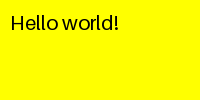

In [12]:
response = requests.post(
    f"{dial_url}/openai/deployments/render-text/chat/completions?api-version=2023-03-15-preview",
    headers={"Api-Key": "dial_api_key"},
    json={"messages": [{"role": "user", "content": "Hello world!"}]},
)
body = response.json()
display(body)
message = body["choices"][0]["message"]
completion = message["content"]
print(f"Completion: {completion!r}")
assert completion == "Image was generated successfully", "Unexpected completion"

image_data = message["custom_content"]["attachments"][0]["data"]
display_base64_image(image_data)

When **streaming is enabled**, the chat completion returns a sequence of messages, each containing a chunk of a generated response:

In [13]:
response = requests.post(
    f"{dial_url}/openai/deployments/render-text/chat/completions?api-version=2023-03-15-preview",
    headers={"Api-Key": "dial_api_key"},
    json={"messages": [{"role": "user", "content": "Hello world!"}], "stream": True},
)
for chunk in response.iter_lines():
    print(chunk)

b'data: {"choices":[{"index":0,"finish_reason":null,"delta":{"role":"assistant"}}],"usage":null,"id":"daf6fbc2-666b-48f2-91d9-1dca46762153","created":1706097974,"object":"chat.completion.chunk"}'
b''
b'data: {"choices":[{"index":0,"finish_reason":null,"delta":{"custom_content":{"attachments":[{"index":0,"type":"image/png","title":"Image","data":"iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAAAGHUlEQVR4nO3ZXWhTZxzH8e9psrbaiNham6JFQS2+QDOsbL4N6lYmoiK+i7tQbwrihYoX4o26zgtFtwkrgyobY9NuoAiKgi+1RqlvuImgNxNFC0XxtbMqvrRJdpGDMaenNpX9183+Ppyb8+TJk+ecfGfSzEkkEPnHZfX0BuT9pLDEhMISEwpLTCgsMaGwxITCEhMKS0woLDGhsMSEwhITCktMKCwxobDExL8dluMwbFinp/9NGW5y2DAcx3wz/xcZhfWWO6u72Zlefmf0USgmFJaYMAlr3z6mTKFfP0Ihpk4lGu3e048eZcYMCgvJzqa4mAULuHjRZ9rYsTgON2+mRn79FcchGOTx49RgbS2OQ01NpusnP/cvXaKsjECAFy/8N7l3r3uN+flUVHD2bPeu8f2XSHR9AEOH+j80dKh3kXXrACZPpqaGb75h9GgCAQ4d8l+q48pffQUwciRbt7JnD19+SThMIMAvv3hfev16gJ07UyNVVQSDAAcPpgbnzwdoasp0fSAcprSUadOoqSEW89nkmjXuNdbW8t13TJpEOMzAgWm3ouOd6VVHZpMyDuvYMYCZM2lvd0daWykuZvBg2tp8lvKc

## Using OpenAI Python SDK

The DIAL deployment could be called using [OpenAI Python SDK](https://pypi.org/project/openai/) as well.


In [15]:
openai_client = openai.AzureOpenAI(
    azure_endpoint=dial_url,
    azure_deployment="render-text",
    api_key="dial_api_key",
    api_version="2023-03-15-preview",
)

Let's call the application in the **non-streaming** mode:

ChatCompletion(id='3969e827-f3c5-410f-b3d1-74218ed56310', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Image was generated successfully', role='assistant', function_call=None, tool_calls=None, custom_content={'attachments': [{'index': 0, 'type': 'image/png', 'title': 'Image', 'data': 'iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAAAGHUlEQVR4nO3ZXWhTZxzH8e9psrbaiNham6JFQS2+QDOsbL4N6lYmoiK+i7tQbwrihYoX4o26zgtFtwkrgyobY9NuoAiKgi+1RqlvuImgNxNFC0XxtbMqvrRJdpGDMaenNpX9183+Ppyb8+TJk+ecfGfSzEkkEPnHZfX0BuT9pLDEhMISEwpLTCgsMaGwxITCEhMKS0woLDGhsMSEwhITCktMKCwxobDExL8dluMwbFinp/9NGW5y2DAcx3wz/xcZhfWWO6u72Zlefmf0USgmFJaYMAlr3z6mTKFfP0Ihpk4lGu3e048eZcYMCgvJzqa4mAULuHjRZ9rYsTgON2+mRn79FcchGOTx49RgbS2OQ01NpusnP/cvXaKsjECAFy/8N7l3r3uN+flUVHD2bPeu8f2XSHR9AEOH+j80dKh3kXXrACZPpqaGb75h9GgCAQ4d8l+q48pffQUwciRbt7JnD19+SThMIMAvv3hfev16gJ07UyNVVQSDAAcPpgbnzwdoasp0fSAcprSUadOoqSEW89nkmjXuNdbW8t13TJpEOMzAgWm3ouOd6VVHZpMyDuvYMYCZM2lvd0daWykuZvBg2tp8lvKcnjqF4x

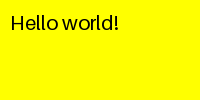

In [18]:

chat_completion = openai_client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Hello world!",
        }
    ],
    model="render-text",
)
print(chat_completion)
message = chat_completion.choices[0].message
completion = message.content
print(f"Completion: {completion!r}")
assert completion == "Image was generated successfully", "Unexpected completion"

image_data = message.custom_content["attachments"][0]["data"]
display_base64_image(image_data)

Let's call the application in the **streaming** mode:

In [19]:
chat_completion = openai_client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Hello world!",
        }
    ],
    stream=True,
    model="render-text",
)
completion = ""
for chunk in chat_completion:
    print(chunk)
    content = chunk.choices[0].delta.content
    if content:
        completion += content
print(f"Completion: {completion!r}")
assert completion == "Image was generated successfully", "Unexpected completion"

ChatCompletionChunk(id='80cd32cd-f36a-41f3-9af4-54947a5243cb', choices=[Choice(delta=ChoiceDelta(content=None, function_call=None, role='assistant', tool_calls=None), finish_reason=None, index=0, logprobs=None)], created=1706098062, model=None, object='chat.completion.chunk', system_fingerprint=None, usage=None)
ChatCompletionChunk(id='80cd32cd-f36a-41f3-9af4-54947a5243cb', choices=[Choice(delta=ChoiceDelta(content=None, function_call=None, role=None, tool_calls=None, custom_content={'attachments': [{'index': 0, 'type': 'image/png', 'title': 'Image', 'data': 'iVBORw0KGgoAAAANSUhEUgAAAMgAAABkCAIAAABM5OhcAAAGHUlEQVR4nO3ZXWhTZxzH8e9psrbaiNham6JFQS2+QDOsbL4N6lYmoiK+i7tQbwrihYoX4o26zgtFtwkrgyobY9NuoAiKgi+1RqlvuImgNxNFC0XxtbMqvrRJdpGDMaenNpX9183+Ppyb8+TJk+ecfGfSzEkkEPnHZfX0BuT9pLDEhMISEwpLTCgsMaGwxITCEhMKS0woLDGhsMSEwhITCktMKCwxobDExL8dluMwbFinp/9NGW5y2DAcx3wz/xcZhfWWO6u72Zlefmf0USgmFJaYMAlr3z6mTKFfP0Ihpk4lGu3e048eZcYMCgvJzqa4mAULuHjRZ9rYsTgON2+mRn79FcchGOTx49RgbS2OQ01NpusnP/cvXaKsjECAFy/8N7

## Using LangChain

The [LangChain](https://pypi.org/project/langchain-openai/) library **is not suitable** as a client of text-to-image applications, since `langchain-openai<=0.0.2` ignores the additional fields attached to the response message.

In [20]:
from langchain_core.messages import HumanMessage

llm = langchain_openai.AzureChatOpenAI(
    azure_endpoint=dial_url,
    azure_deployment="render-text",
    api_key="dial_api_key",
    api_version="2023-03-15-preview",
)

Let's call the application in the **non-streaming** mode:

In [21]:
output = llm.generate(messages=[[HumanMessage(content="Hello world!")]])
print(output)
completion = output.generations[0][0].text
print(f"Completion: {completion!r}")
assert completion == "Image was generated successfully", "Unexpected completion"

generations=[[ChatGeneration(text='Image was generated successfully', generation_info={'finish_reason': 'stop', 'logprobs': None}, message=AIMessage(content='Image was generated successfully'))]] llm_output={'token_usage': {}, 'model_name': 'gpt-3.5-turbo'} run=[RunInfo(run_id=UUID('9de1c192-fedc-4a7d-b38d-cd7b4aa221cf'))]
Completion: 'Image was generated successfully'


Let's call the application in the **streaming** mode:

In [22]:
output = llm.stream(input=[HumanMessage(content="Hello world!")])
completion = ""
for chunk in output:
    print(chunk.dict())
    completion += chunk.content
print(f"Completion: {completion!r}")
assert completion == "Image was generated successfully", "Unexpected completion"

{'content': '', 'additional_kwargs': {}, 'type': 'AIMessageChunk', 'example': False}
{'content': '', 'additional_kwargs': {}, 'type': 'AIMessageChunk', 'example': False}
{'content': 'Image was generated successfully', 'additional_kwargs': {}, 'type': 'AIMessageChunk', 'example': False}
{'content': '', 'additional_kwargs': {}, 'type': 'AIMessageChunk', 'example': False}
Completion: 'Image was generated successfully'
